In [2]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa


In [10]:
def parser(row):
    file_name = os.path.join("six_sec_glass", 'Train ('+ str(row) + ')'+'.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=16000,mono=True) 
        pre_emphasis = 1
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
       
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc=np.mean(mfccs.T,axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs,mel,contrast,tonnetz,row


In [3]:
def parser2(row):
    file_name = os.path.join("special_metal", 'metal'+ str(row) + '.wav')
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=16000,mono=True) 
        pre_emphasis = 2
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfccs,chroma,contrast,tonnetz,row

In [4]:
def feature():
    features=np.empty((0,65))
    label=np.empty((0,1))
    for i in range(1,200):
        mfccs,chroma,contrast,tonnetz,l=parser(i)
        ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,1))

    for i in range(1,200):
        mfccs,chroma,contrast,tonnetz,l=parser2(i)
        ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,0))
    
    return features,label

In [5]:
f=np.load('f__normaudio_22500_cry_noise.npy');
l=np.load('l_normaudio_22500_cry_noise.npy');

In [6]:
print(f.shape)

(2321, 64)


In [7]:
print(f)

[[116.55389404  21.57925606 -30.14768219 ...  -0.71767622  -0.91610169
   -3.39461827]
 [  5.88216782  19.59017754 -29.2092762  ...  -4.49240446  -2.80498528
   -3.7376616 ]
 [159.57069397  37.58674622 -30.58213234 ...  -1.66211641  -1.26535654
   -3.44286633]
 ...
 [ 68.98033142 184.38433838 -92.3743515  ...  -2.10160065  -0.28934723
   -1.26236653]
 [ 79.11392975 183.36891174 -91.34640503 ...  -3.55463576  -1.41562414
   -2.34592724]
 [ 67.98453522 168.72894287 -76.39689636 ...  -2.70045614  -1.31228805
   -1.11745501]]


In [8]:
print(f.shape)

(2321, 64)


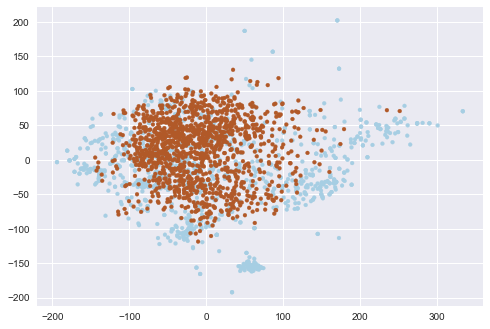

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

X=f
y=l.ravel()

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)
plt.style.use("seaborn")

plt.scatter(Xreduced[:, 0], Xreduced[:, 1], c=y, s=15, cmap=plt.cm.Paired)

In [11]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

In [8]:
clf = SVC(kernel='rbf',C=10,gamma=0.1, degree=2, probability=True)
clf.fit(f, l.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)
rf.fit(f, l.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)

In [8]:
print(l.shape)

(2234, 1)


In [31]:
t, sample_rate = librosa.load('metal1.wav',sr=16000,mono=True) 

In [27]:
pre_emphasis = 2
X = np.append(t[0], t[1:] - pre_emphasis * t[:-1])
stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
spectral_centroids = np.mean(librosa.feature.spectral_centroid(X, sr=sample_rate).T,axis=0)
spectral_rolloff =  np.mean(librosa.feature.spectral_rolloff(X, sr=sample_rate).T,axis=0)

In [28]:
features_t=np.empty((0,40))
#ext_features_t = np.hstack([mfccs,chroma,mel])
features_t = np.vstack([features_t,mfccs])


In [29]:
print(l.shape)
print(l)

(2198, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [30]:
clf.predict(features_t)

array([1.])

In [32]:
def parser3(row):
    file_name = os.path.join("test_data","Crying", 'test_cry ('+ str(row)+')' + '.wav')
    try:
        
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=22500,mono=True) 
        pre_emphasis = 5
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
       
        mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64)
        mfccs = (mfccs-np.mean(mfccs))/np.std(mfccs)
        mfcc = np.mean(mfccs.T,axis=0)
         
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    print(row)
    return mfcc

In [33]:
def feature_test():
    features=np.empty((0,64))
    y_test=np.empty((0,1))
    for i in range(1,190):
        mfccs=parser3(i)
        features = np.vstack([features,mfccs])
        y_test=np.vstack((y_test,1))
      
    return features,y_test

In [34]:
test_feature,y_test=feature_test()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189


In [35]:
a=clf.predict(test_feature)

#print(y_test.shape)

In [36]:
for i,each in enumerate(a,start=1):
    print ("{}   {}".format(i,each))


1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10   1.0
11   1.0
12   1.0
13   1.0
14   1.0
15   1.0
16   1.0
17   1.0
18   1.0
19   1.0
20   1.0
21   1.0
22   1.0
23   1.0
24   1.0
25   1.0
26   1.0
27   1.0
28   1.0
29   1.0
30   1.0
31   1.0
32   1.0
33   0.0
34   0.0
35   1.0
36   1.0
37   1.0
38   1.0
39   1.0
40   1.0
41   1.0
42   1.0
43   1.0
44   1.0
45   1.0
46   1.0
47   1.0
48   1.0
49   1.0
50   1.0
51   1.0
52   1.0
53   1.0
54   1.0
55   1.0
56   1.0
57   1.0
58   1.0
59   1.0
60   1.0
61   1.0
62   1.0
63   1.0
64   1.0
65   1.0
66   1.0
67   1.0
68   1.0
69   1.0
70   1.0
71   1.0
72   1.0
73   1.0
74   1.0
75   1.0
76   1.0
77   1.0
78   1.0
79   1.0
80   1.0
81   1.0
82   1.0
83   1.0
84   1.0
85   1.0
86   1.0
87   1.0
88   1.0
89   1.0
90   1.0
91   1.0
92   1.0
93   1.0
94   1.0
95   1.0
96   1.0
97   1.0
98   1.0
99   1.0
100   1.0
101   1.0
102   1.0
103   1.0
104   1.0
105   1.0
106   1.0
107   1.0
108   1.0
109   1.0
110   1.0
111   1.

In [37]:
acc = clf.score(test_feature, y_test)
print("acc=%0.5f" % acc)

acc=0.93122


In [38]:
np.unique(a,return_counts=True)

(array([0., 1.]), array([ 13, 176], dtype=int64))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(f, l.ravel(), test_size=0.4, random_state=0)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-2,1e-1,1],'C': [5,10,20],'degree':[2,3]}]
                     
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print('')

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print('')
    print(clf.best_params_)
    print('')
    print("Grid scores on development set:")
    print('')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print('')
    print("Detailed classification report:")
    print('')
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print('')
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')

# Tuning hyper-parameters for precision

